In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt




import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/adult-income-dataset/adult.csv


Let's start with importing our data and , take a look at it.

In [2]:
data = pd.read_csv("/kaggle/input/adult-income-dataset/adult.csv")
data = pd.DataFrame(data, columns=data.columns)
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


This dataset has so much non-numerical data , we must encode them but first i need to divide my labels and features.

In [3]:
data.income = [1 if each=='>50K' else 0 for each in data.income]
y = data.income
y

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64

As you can see i got my labels as y and encoded them if bigger than 50K to 1 else 0.

In [4]:
data.drop(["fnlwgt","native-country"],axis=1,inplace=True)
data

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,1
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,0
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,1
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,0
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,0


It's time for encoding other features !

In [5]:
data = pd.get_dummies(data)
data

,age,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Female,gender_Male
0,25,7,0,0,40,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
1,38,9,0,0,50,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,28,12,0,0,40,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,44,10,7688,0,40,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,18,10,0,0,30,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,38,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
48838,40,9,0,0,40,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
48839,58,9,0,0,40,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
48840,22,9,0,0,20,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


Now i will split my data for visualization.

In [6]:
over  = data[data.income == 1]
below = data[data.income == 0]
over

,age,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Female,gender_Male
2,28,12,0,0,40,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,44,10,7688,0,40,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
7,63,15,3103,0,32,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
10,65,9,6418,0,40,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
14,48,9,3103,0,48,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48820,71,16,0,0,10,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
48826,39,12,0,0,20,1,0,0,1,0,...,0,0,1,0,0,0,0,1,1,0
48835,53,14,0,0,40,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
48838,40,9,0,0,40,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


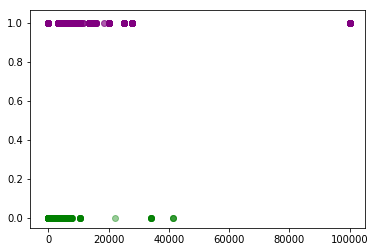

In [7]:
plt.scatter(over["capital-gain"],over.income,color='purple',alpha=0.4,label='kotu')
plt.scatter(below["capital-gain"],below.income,color='green',alpha=0.4,label='iyi')

I am splitting my data for training and testing.

In [8]:
from sklearn.model_selection import train_test_split
x_train , x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

NameError: name 'x' is not defined

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
score_list=[]
score_list2=[]
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    score_list.append(knn.score(x_test,y_test))
plt.plot(range(1,20),score_list)
plt.show()

In [ ]:
score_list2=[]
for i in range(20,40):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train,y_train)
    score_list2.append(knn2.score(x_test,y_test))
plt.plot(range(20,40),score_list2)
plt.show()

Our maximum accuracy is not so good but if we use K=33 it gives maximum.

In [ ]:
knn3 = KNeighborsClassifier(n_neighbors=33)

knn3.fit(x_train,y_train)
print(knn3.score(x_test,y_test))